## <div align="center"> LAB IS794 Deep Learning </div>
## <div align="center"> GROUP 06: PENGEMBANGAN MODEL DEEP LEARNING UNTUK MENDETEKSI SPAM EMAIL</div>
#### <div align="center"> Odd Semester 2025/2026 </div>
---

In [97]:
import datetime
import uuid

In [139]:
import datetime
import uuid

student1 = "Nikolas Lyen Agung - 00000098199"
student2 = "Jonathan Candra"
student3 = "Darren Chikal Setiawan"
student4 = "Alvin Clarence"
student5 = "Johanes Sebastian W.A"

---

### Enter Code Here:

1. IMPORT LIBRARIES

In [99]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense,Embedding,Dropout,LSTM,Bidirectional,GRU,Conv1D,Flatten
import pandas as pd 
import numpy as np

2. LOAD THE DATA

In [100]:
df_csv = pd.read_csv('Dataset_Email.csv')

In [101]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sender       2747 non-null   object
 1   receiver     2666 non-null   object
 2   date         2747 non-null   object
 3   subject      2747 non-null   object
 4   body         2747 non-null   object
 5   label        2747 non-null   int64 
 6   urls         2747 non-null   int64 
 7   source       2747 non-null   object
 8   file_source  2747 non-null   object
dtypes: int64(2), object(7)
memory usage: 193.3+ KB


3. Print 5 data awal

In [102]:
print(df_csv.head(5))

                                              sender  \
0                    vcqztr_2gk1525@deutsche-bank.de   
1             K1-Sexkontaktmagazin <news@k1-web.com>   
2                                      IA@rogers.com   
3  Reports You Need To Make Cash! <John@ABigClick...   
4  "zzzz-latestdodgydotcomstock" <jm-latestdodgyd...   

                                            receiver  \
0                                    <ilug@linux.ie>   
1                                   <ler@lerctr.org>   
2                        Internet.Access@webnote.net   
3  Reports You Need To Make Cash! <jjbaxter2453@a...   
4  "zzzz-latestdodgydotcomstock" <jm-latestdodgyd...   

                                           date  \
0                 Sat,7 Sep 2002 11:48:19 +0100   
1                Tue,03 Sep 2002 21:41:16 +0100   
2                Mon,26 Aug 2002 05:48:48 -1000   
3                Fri,19 Jul 2002 03:28:09 -0400   
4  Fri,30 Aug 02 21:48:08 Eastern Daylight Time   

                   

4. Menampilkan jumlah baris dan kolom

In [103]:
df_csv.shape

(2747, 9)

In [104]:
df_csv.columns

Index(['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls',
       'source', 'file_source'],
      dtype='object')

5. Mengecek data duplikat dan menghapus jika ada

In [ ]:
df_csv.drop_duplicates(inplace = True)

6. Mengecek kembali bentuk data (jumlah baris dan kolom setelah dihapus duplikat)

In [ ]:
df_csv.shape

(2747, 9)

7. Mengecek jumlah nilai kosong di setiap kolom

In [107]:
df_csv.isnull().sum()

sender          0
receiver       81
date            0
subject         0
body            0
label           0
urls            0
source          0
file_source     0
dtype: int64

8. Mengecek apakah ada data kosong di kolom ‘body’

In [108]:
print (df_csv['body'].isnull().sum())

0


9. Mengecek tipe data pada kolom ‘body’

In [109]:
print(df_csv['body'].apply(type).value_counts())

body
<class 'str'>    2747
Name: count, dtype: int64


10. Mengganti nilai kosong di kolom ‘body’ dengan string kosong

In [110]:
df_csv['body'] = df_csv['body'].fillna('')

11. Menyimpan teks dan label dari dataset

In [138]:
texts = df_csv['body']
labels = df_csv['label']

12. Mengubah label menjadi bentuk numerik (0 = fake, 1 = real)

In [113]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

13. Menampilkan distribusi label dalam bentuk diagram batang

<Axes: xlabel='label'>

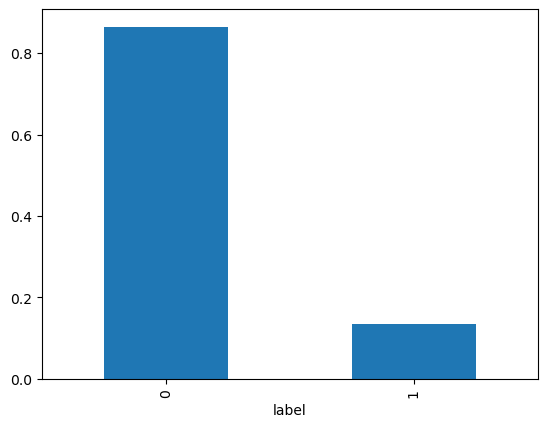

In [114]:
df_csv['label'].value_counts(normalize = True).plot.bar()

14. Membagi dataset menjadi data latih dan data uji (Train/Test)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

15. Melakukan tokenisasi pada data teks

In [119]:
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(X_train)

16. Mengubah teks menjadi urutan angka

In [121]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq =tokenizer.texts_to_sequences(X_test)

17. Melakukan padding agar panjang setiap urutan sama

In [123]:
max_length = 200
X_train_pad = pad_sequences(X_train_seq,padding='post',maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, padding='post',maxlen=max_length)

# RNN

In [ ]:
# Membuat model SimpleRNN
model = Sequential()

# Layer Embedding untuk merepresentasikan kata ke dalam bentuk vektor padat
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length))

# Layer RNN sederhana
model.add(SimpleRNN(units=64, activation='tanh'))

# Layer Dropout untuk mengurangi terjadinya overfitting
model.add(Dropout(0.5))

# Layer Dense output (biner)
model.add(Dense(1, activation='sigmoid'))

# Menyusun (compile) model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Melatih model
history_rnn = model.fit(X_train_pad, y_train,
                        epochs=10,
                        batch_size=64,
                        validation_data=(X_test_pad, y_test))

Epoch 1/10


c:\Users\nikol\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.8580 - loss: 0.4480 - val_accuracy: 0.8655 - val_loss: 0.3814
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8824 - loss: 0.3730 - val_accuracy: 0.8745 - val_loss: 0.3703
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8958 - loss: 0.3452 - val_accuracy: 0.8800 - val_loss: 0.3600
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9003 - loss: 0.3172 - val_accuracy: 0.5309 - val_loss: 0.5867
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.7885 - loss: 0.4809 - val_accuracy: 0.8473 - val_loss: 0.4227
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8609 - loss: 0.3953 - val_accuracy: 0.8618 - val_loss: 0.3865
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8777 - loss: 0.3870 - val_accuracy: 0.8764 - val_loss: 0.3745
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9027 - loss: 0.3407 - val_accuracy: 0.8727 - val_loss: 0.

# RNN tanpa Adam learning rate

In [ ]:
#Buat model Simple RNN
model = Sequential()
# Layer Embedding untuk representasi kata 
model.add(Embedding(input_dim=10000,output_dim=128,input_length=max_length))
# Layer RNN sederhana
model.add(SimpleRNN(units=64,activation='tanh'))
# Layer output
model.add(Dense(1,activation='sigmoid'))
# Menyusun model dengan optimizer default
model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])
# Melatih model
history_rnna = model.fit(X_train_pad,y_train,epochs=10,batch_size=64,validation_data=(X_test_pad,y_test))

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8666 - loss: 0.4287 - val_accuracy: 0.8691 - val_loss: 0.3925
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8937 - loss: 0.3430 - val_accuracy: 0.8764 - val_loss: 0.3702
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9089 - loss: 0.3176 - val_accuracy: 0.8891 - val_loss: 0.3512
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8945 - loss: 0.3310 - val_accuracy: 0.8836 - val_loss: 0.3575
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9088 - loss: 0.2931 - val_accuracy: 0.8727 - val_loss: 0.3648
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9046 - loss: 0.2953 - val_accuracy: 0.8727 - val_loss: 0.3600
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9079 - loss: 0.2921 - val_accuracy: 0.8636 - val_loss: 0.3677
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9138 - loss: 0.2794 - val_accuracy: 0.8709 - v

# RNN tanpa Dropout

In [ ]:
# Membuat model SimpleRNN
model = Sequential()

# Layer Embedding
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length))

# Layer RNN
model.add(SimpleRNN(units=64, activation='tanh'))

# Layer output
model.add(Dense(1, activation='sigmoid'))

# Menyusun model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Melatih model
history_rnnd = model.fit(X_train_pad, y_train,
                        epochs=10,
                        batch_size=64,
                        validation_data=(X_test_pad, y_test))

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.8072 - loss: 0.4855 - val_accuracy: 0.8600 - val_loss: 0.3986
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.8603 - loss: 0.3862 - val_accuracy: 0.8636 - val_loss: 0.3811
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8936 - loss: 0.3382 - val_accuracy: 0.8545 - val_loss: 0.3821
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9091 - loss: 0.3063 - val_accuracy: 0.8745 - val_loss: 0.3682
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9023 - loss: 0.3103 - val_accuracy: 0.8727 - val_loss: 0.3756
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8976 - loss: 0.3062 - val_accuracy: 0.8455 - val_loss: 0.4011
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9008 - loss: 0.3165 - val_accuracy: 0.8673 - val_loss: 0.4667
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9081 - loss: 0.3339 - val_accuracy: 0.8709 - v

# RNN pake dropout yang berbeda 
(Sebelumnya 0.5 untuk percobaan diganti jadi 0.4)

In [ ]:
# Membuat model LSTM
model = Sequential()
# Layer Embedding
model.add(Embedding(input_dim=10000,output_dim=128,input_length=max_length))
# Layer LSTM
model.add(SimpleRNN(units=64,activation='tanh'))
# Layer Dropout untuk mencegah overfitting
model.add(Dropout(0.4))
# Layer output
model.add(Dense(1,activation='sigmoid'))
# Menyusun model
model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])
# Melatih model
history_rnndd = model.fit(X_train_pad,y_train,epochs=10,batch_size=64,validation_data=(X_test_pad,y_test))

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.8099 - loss: 0.4736 - val_accuracy: 0.8782 - val_loss: 0.3854
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.8889 - loss: 0.3644 - val_accuracy: 0.8782 - val_loss: 0.3736
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.8888 - loss: 0.3476 - val_accuracy: 0.8655 - val_loss: 0.3683
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9033 - loss: 0.3066 - val_accuracy: 0.8709 - val_loss: 0.3982
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8977 - loss: 0.3441 - val_accuracy: 0.8818 - val_loss: 0.3663
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9046 - loss: 0.3085 - val_accuracy: 0.8818 - val_loss: 0.3629
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9101 - loss: 0.2766 - val_accuracy: 0.8727 - val_loss: 0.3989
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9046 - loss: 0.3118 - val_accuracy: 0.8764 - v

# LSTM model

In [128]:
#Buat model Simple RNN
model = Sequential()
#Embedding Layer to represent words as dense vectors 
model.add(Embedding(input_dim=10000,output_dim=128,input_length=max_length))
#LSTM Layer
model.add(LSTM(units=100))
#Dropout Layer untuk menghindari overfitting
model.add(Dropout(0.5))
#Dense Layer for output
model.add(Dense(1,activation='sigmoid'))
#Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy',metrics=['accuracy'])
#Training the model
history_lstm = model.fit(X_train_pad,y_train,epochs=10,batch_size=64,validation_data=(X_test_pad,y_test))

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - accuracy: 0.8530 - loss: 0.4767 - val_accuracy: 0.8600 - val_loss: 0.3889
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - accuracy: 0.8730 - loss: 0.3750 - val_accuracy: 0.8745 - val_loss: 0.3697
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8709 - loss: 0.3962 - val_accuracy: 0.8764 - val_loss: 0.3779
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.8952 - loss: 0.3482 - val_accuracy: 0.8855 - val_loss: 0.3433
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.9079 - loss: 0.3175 - val_accuracy: 0.8927 - val_loss: 0.3402
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.9003 - loss: 0.3285 - val_accuracy: 0.8909 - val_loss: 0.3420
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.9027 - loss: 0.3146 - val_accuracy: 0.8927 - val_loss: 0.3393
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.9048 - loss: 0.3097 - val_accuracy: 0.

# BLSTM

In [ ]:
model =Sequential() 
model.add(Embedding(input_dim=10000,output_dim=50,input_length=150))
model.add(Bidirectional(LSTM(units=100)))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

# Melatih model
history_bilstm = model.fit(X_train_pad, y_train,epochs=10, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - accuracy: 0.8212 - loss: 0.5062 - val_accuracy: 0.8600 - val_loss: 0.3510
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 0.8732 - loss: 0.2994 - val_accuracy: 0.9309 - val_loss: 0.1868
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 191ms/step - accuracy: 0.9541 - loss: 0.1405 - val_accuracy: 0.9491 - val_loss: 0.1367
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 190ms/step - accuracy: 0.9866 - loss: 0.0538 - val_accuracy: 0.9582 - val_loss: 0.1171
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - accuracy: 0.9930 - loss: 0.0407 - val_accuracy: 0.9709 - val_loss: 0.1107
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 181ms/step - accuracy: 0.9919 - loss: 0.0403 - val_accuracy: 0.9673 - val_loss: 0.0996
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 190ms/step - accuracy: 0.9958 - loss: 0.0212 - val_accuracy: 0.9618 - val_loss: 0.1066
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 184ms/step - accuracy: 0.9943 - loss: 0.0162 - val_accuracy: 0

# GRU

In [130]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=50, input_length=150))
model.add(GRU(units=100))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
history_gru = model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.8359 - loss: 0.5325 - val_accuracy: 0.8600 - val_loss: 0.3987
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.8647 - loss: 0.3924 - val_accuracy: 0.8600 - val_loss: 0.3876
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.8630 - loss: 0.3800 - val_accuracy: 0.8600 - val_loss: 0.3845
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.8817 - loss: 0.3540 - val_accuracy: 0.8600 - val_loss: 0.3800
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8634 - loss: 0.3772 - val_accuracy: 0.8709 - val_loss: 0.3708
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.8962 - loss: 0.3364 - val_accuracy: 0.8891 - val_loss: 0.3600
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.9043 - loss: 0.3202 - val_accuracy: 0.9182 - val_loss: 0.2836
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.9050 - loss: 0.3324 - val_accuracy: 0.

# CNN

In [131]:
model= Sequential()
#Embedding Layer
model.add(Embedding(input_dim=10000,output_dim=50,input_length=150))
#Convulation Layer
model.add(Conv1D(filters=128,kernel_size=5,activation='relu'))
#Dropout Layer mengurangi Overfit
model.add(Dropout(0.5))
#flatten layer untuk convert 2D tensor ke 1D tensor
model.add(Flatten())
#Dense Layer with a single output neuron for (binary classification)
model.add(Dense(1,activation='sigmoid'))
#Compile model
model.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
#Train model
history_cnn= model.fit(X_train_pad,y_train,epochs=10,batch_size=64,validation_data=(X_test_pad,y_test))

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8183 - loss: 0.4604 - val_accuracy: 0.8600 - val_loss: 0.3523
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8586 - loss: 0.3312 - val_accuracy: 0.8927 - val_loss: 0.2192
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9485 - loss: 0.1341 - val_accuracy: 0.9600 - val_loss: 0.1026
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9868 - loss: 0.0450 - val_accuracy: 0.9600 - val_loss: 0.1063
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9904 - loss: 0.0240 - val_accuracy: 0.9582 - val_loss: 0.0945
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9920 - loss: 0.0234 - val_accuracy: 0.9600 - val_loss: 0.0955
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9942 - loss: 0.0134 - val_accuracy: 0.9600 - val_loss: 0.1241
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9953 - loss: 0.0121 - val_accuracy: 0.9636 - v

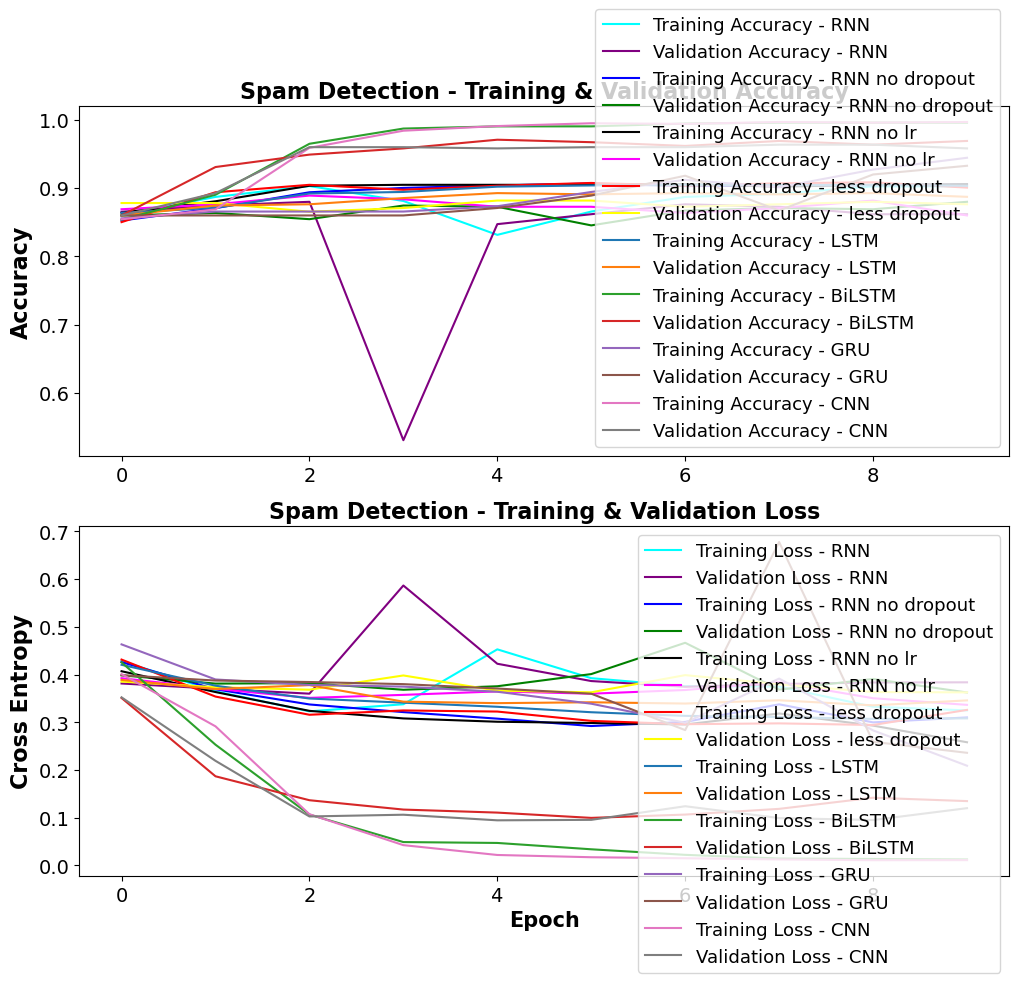

In [ ]:
import matplotlib.pyplot as plt

# Akurasi dari berbagai model
acc1 = history_rnn.history['accuracy']
val_acc1 = history_rnn.history['val_accuracy']

acc2 = history_rnnd.history['accuracy']
val_acc2 = history_rnnd.history['val_accuracy']

acc3 = history_rnna.history['accuracy']
val_acc3 = history_rnna.history['val_accuracy']

acc4 = history_rnndd.history['accuracy']
val_acc4 = history_rnndd.history['val_accuracy']

acc5 = history_lstm.history['accuracy']
val_acc5 = history_lstm.history['val_accuracy']

acc6 = history_bilstm.history['accuracy']
val_acc6 = history_bilstm.history['val_accuracy']

acc7 = history_gru.history['accuracy']
val_acc7 = history_gru.history['val_accuracy']

acc8 = history_cnn.history['accuracy']
val_acc8 = history_cnn.history['val_accuracy']

# Loss dari berbagai model
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']

loss1 = history_rnnd.history['loss']
val_loss1 = history_rnnd.history['val_loss']

loss2 = history_rnna.history['loss']
val_loss2 = history_rnna.history['val_loss']

loss3 = history_rnndd.history['loss']
val_loss3 = history_rnndd.history['val_loss']

loss4 = history_lstm.history['loss']
val_loss4 = history_lstm.history['val_loss']

loss5 = history_bilstm.history['loss']
val_loss5 = history_bilstm.history['val_loss']

loss6 = history_gru.history['loss']
val_loss6 = history_gru.history['val_loss']

loss7 = history_cnn.history['loss']
val_loss7 = history_cnn.history['val_loss']


plt.figure(figsize=(12, 10))

# Plot akurasi tiap model
plt.subplot(2, 1, 1)

plt.plot(acc1, label='Training Accuracy - RNN', color='cyan')
plt.plot(val_acc1, label='Validation Accuracy - RNN', color='purple')

plt.plot(acc2, label='Training Accuracy - RNN no dropout', color='blue')
plt.plot(val_acc2, label='Validation Accuracy - RNN no dropout', color='green')

plt.plot(acc3, label='Training Accuracy - RNN no lr', color='black')
plt.plot(val_acc3, label='Validation Accuracy - RNN no lr', color='magenta')

plt.plot(acc4, label='Training Accuracy - less dropout', color='red')
plt.plot(val_acc4, label='Validation Accuracy - less dropout', color='yellow')

plt.plot(acc5, label='Training Accuracy - LSTM', color='C0')
plt.plot(val_acc5, label='Validation Accuracy - LSTM', color='C1')

plt.plot(acc6, label='Training Accuracy - BiLSTM', color='C2')
plt.plot(val_acc6, label='Validation Accuracy - BiLSTM', color='C3')

plt.plot(acc7, label='Training Accuracy - GRU', color='C4')
plt.plot(val_acc7, label='Validation Accuracy - GRU', color='C5')

plt.plot(acc8, label='Training Accuracy - CNN', color='C6')
plt.plot(val_acc8, label='Validation Accuracy - CNN', color='C7')



plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('Spam Detection - Training & Validation Accuracy', fontsize=16, weight='bold')

# Plot loss tiap model
plt.subplot(2, 1, 2)

plt.plot(loss, label='Training Loss - RNN', color='cyan')
plt.plot(val_loss, label='Validation Loss - RNN', color='purple')

plt.plot(loss1, label='Training Loss - RNN no dropout', color='blue')
plt.plot(val_loss1, label='Validation Loss - RNN no dropout', color='green')

plt.plot(loss2, label='Training Loss - RNN no lr', color='black')
plt.plot(val_loss2, label='Validation Loss - RNN no lr', color='magenta')

plt.plot(loss3, label='Training Loss - less dropout', color='red')
plt.plot(val_loss3, label='Validation Loss - less dropout', color='yellow')

plt.plot(loss4, label='Training Loss - LSTM', color='C0')
plt.plot(val_loss4, label='Validation Loss - LSTM', color='C1')

plt.plot(loss5, label='Training Loss - BiLSTM', color='C2')
plt.plot(val_loss5, label='Validation Loss - BiLSTM', color='C3')

plt.plot(loss6, label='Training Loss - GRU', color='C4')
plt.plot(val_loss6, label='Validation Loss - GRU', color='C5')

plt.plot(loss7, label='Training Loss - CNN', color='C6')
plt.plot(val_loss7, label='Validation Loss - CNN', color='C7')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('Spam Detection - Training & Validation Loss', fontsize=16, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')
plt.show()

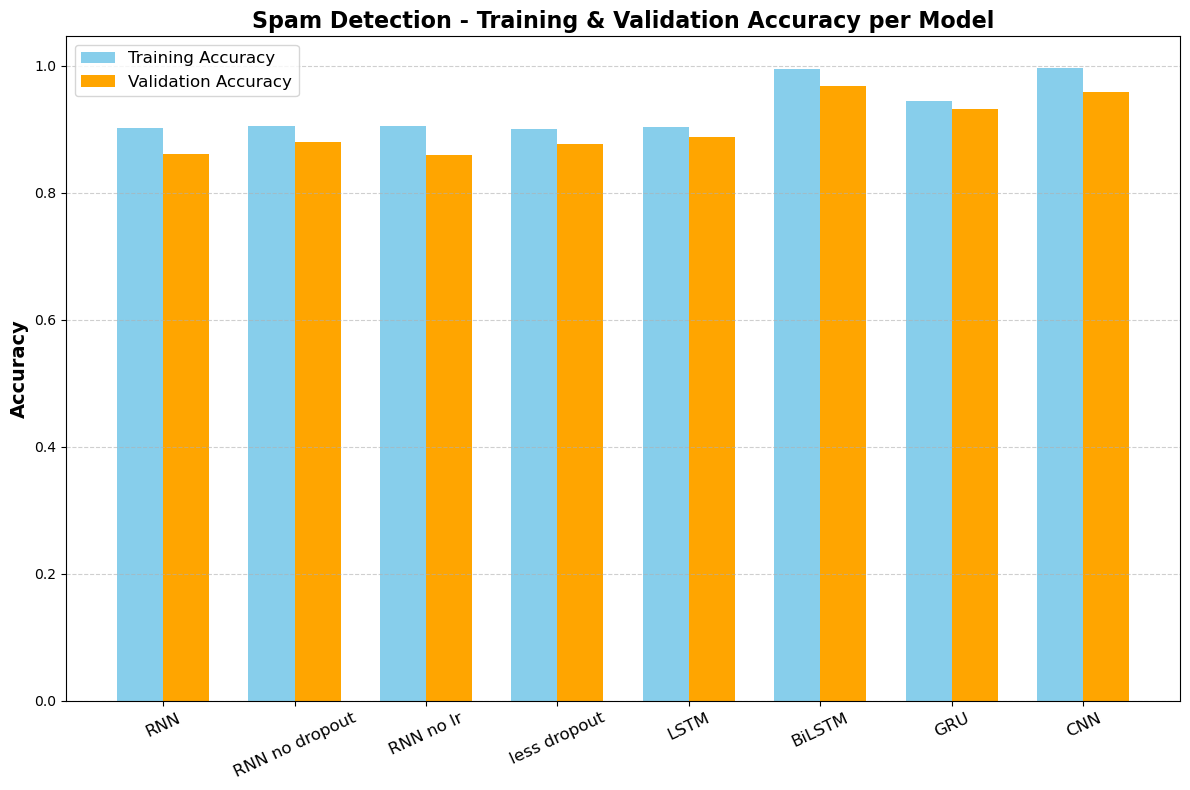

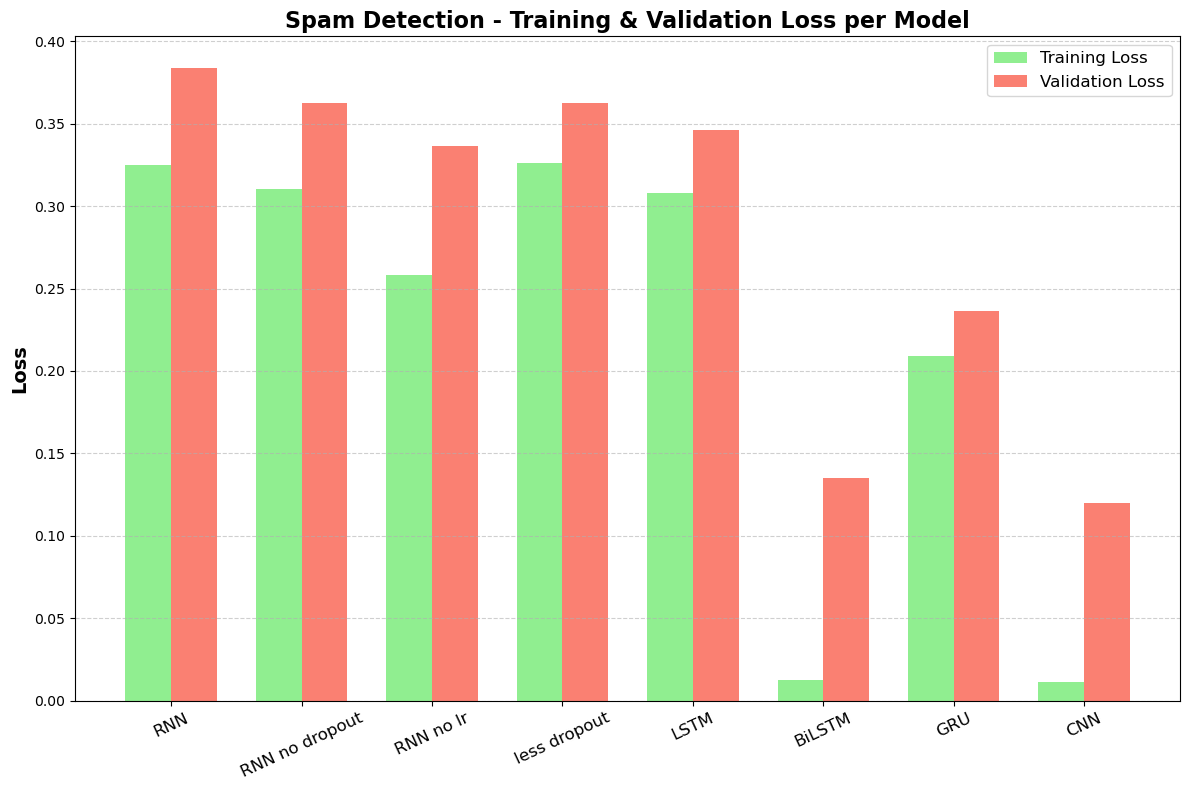

In [ ]:
# Ambil nilai terakhir (epoch terakhir) dari setiap model 
models = [
    'RNN', 'RNN no dropout', 'RNN no lr', 'less dropout',
    'LSTM', 'BiLSTM', 'GRU', 'CNN'
]

train_acc = [
    history_rnn.history['accuracy'][-1],
    history_rnnd.history['accuracy'][-1],
    history_rnna.history['accuracy'][-1],
    history_rnndd.history['accuracy'][-1],
    history_lstm.history['accuracy'][-1],
    history_bilstm.history['accuracy'][-1],
    history_gru.history['accuracy'][-1],
    history_cnn.history['accuracy'][-1]
]

val_acc = [
    history_rnn.history['val_accuracy'][-1],
    history_rnnd.history['val_accuracy'][-1],
    history_rnna.history['val_accuracy'][-1],
    history_rnndd.history['val_accuracy'][-1],
    history_lstm.history['val_accuracy'][-1],
    history_bilstm.history['val_accuracy'][-1],
    history_gru.history['val_accuracy'][-1],
    history_cnn.history['val_accuracy'][-1]
]

train_loss = [
    history_rnn.history['loss'][-1],
    history_rnnd.history['loss'][-1],
    history_rnna.history['loss'][-1],
    history_rnndd.history['loss'][-1],
    history_lstm.history['loss'][-1],
    history_bilstm.history['loss'][-1],
    history_gru.history['loss'][-1],
    history_cnn.history['loss'][-1]
]

val_loss = [
    history_rnn.history['val_loss'][-1],
    history_rnnd.history['val_loss'][-1],
    history_rnna.history['val_loss'][-1],
    history_rnndd.history['val_loss'][-1],
    history_lstm.history['val_loss'][-1],
    history_bilstm.history['val_loss'][-1],
    history_gru.history['val_loss'][-1],
    history_cnn.history['val_loss'][-1]
]


x = np.arange(len(models))
width = 0.35  # lebar batang


plt.figure(figsize=(12, 8))
plt.bar(x - width/2, train_acc, width, label='Training Accuracy', color='skyblue')
plt.bar(x + width/2, val_acc, width, label='Validation Accuracy', color='orange')

plt.xticks(x, models, rotation=25, fontsize=12)
plt.ylabel('Accuracy', fontsize=14, weight='bold')
plt.title('Spam Detection - Training & Validation Accuracy per Model', fontsize=16, weight='bold')
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))
plt.bar(x - width/2, train_loss, width, label='Training Loss', color='lightgreen')
plt.bar(x + width/2, val_loss, width, label='Validation Loss', color='salmon')

plt.xticks(x, models, rotation=25, fontsize=12)
plt.ylabel('Loss', fontsize=14, weight='bold')
plt.title('Spam Detection - Training & Validation Loss per Model', fontsize=16, weight='bold')
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


----

## <div align="center"> Conclusion </div>

### Enter Your Conclusion Here:

----

----

## <div align="center"> Reference </div>

### Input Your Reference Here  (If any):

----